In [167]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import sqlite3

%matplotlib inline

In [168]:
# 1. Define the URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

In [169]:
# 2. Send a GET request to the URL and parse the page with BeautifulSoup
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [170]:
# 3. Find all tables on the page
all_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(all_tables)))

Total number of tables are 7 


In [171]:
# 4. Find the right table (you may need to inspect the page source)
table = tables[2]

In [172]:
# 5. Separate the source names and their corresponding data
source_names = []
data_rows = []

for row in table.find_all('tr'):
    columns = row.find_all('td')
    if len(columns) >= 2:
        source_names.append(columns[0].text.strip())
        data_rows.append([cell.text.strip() for cell in columns[1:]])

In [173]:
# 6. Get the source names from the list of sources you have created
print("Source Names:")
print(source_names)

Source Names:
['World', 'United States', 'China', 'Japan', 'Germany', 'India', 'United Kingdom', 'France', 'Italy', 'Canada', 'Brazil', 'Russia', 'South Korea', 'Australia', 'Mexico', 'Spain', 'Indonesia', 'Netherlands', 'Saudi Arabia', 'Turkey', 'Switzerland', 'Taiwan', 'Poland', 'Argentina', 'Belgium', 'Sweden', 'Ireland', 'Thailand', 'Norway', 'Israel', 'Singapore', 'Austria', 'Nigeria', 'United Arab Emirates', 'Vietnam', 'Malaysia', 'Philippines', 'Bangladesh', 'Denmark', 'South Africa', 'Hong Kong', 'Egypt', 'Iran', 'Chile', 'Romania', 'Pakistan', 'Colombia', 'Czech Republic', 'Finland', 'Peru', 'Iraq', 'Portugal', 'New Zealand', 'Kazakhstan', 'Greece', 'Qatar', 'Algeria', 'Hungary', 'Kuwait', 'Ethiopia', 'Ukraine', 'Morocco', 'Slovakia', 'Ecuador', 'Dominican Republic', 'Puerto Rico', 'Kenya', 'Angola', 'Cuba', 'Oman', 'Guatemala', 'Bulgaria', 'Venezuela', 'Uzbekistan', 'Luxembourg', 'Tanzania', 'Turkmenistan', 'Croatia', 'Lithuania', 'Costa Rica', 'Uruguay', 'Panama', 'Ivory Coa

In [174]:
# 7. Separate the header and data for the first source and create a DataFrame
header = data_rows[0]
data = data_rows[1:]

In [175]:
# Create a DataFrame for the first source
df_source1 = pd.DataFrame(data, columns=header)

In [176]:
# Print the first few rows of the DataFrame for the first source
print("\nDataFrame for the First Source:")
print(df_source1.head())


DataFrame for the First Source:
          — 105,568,776       2023 100,562,011       2022  96,698,005  \
0  Americas  26,854,599       2023  25,462,700       2022  23,315,081   
1      Asia  19,373,586  [n 1]2023  17,963,171  [n 3]2022  17,734,131   
2      Asia   4,409,738       2023   4,231,141       2022   4,940,878   
3    Europe   4,308,854       2023   4,072,192       2022   4,259,935   
4      Asia   3,736,882       2023   3,385,090       2022   3,201,471   

        2021  
0       2021  
1  [n 1]2021  
2       2021  
3       2021  
4       2021  


In [177]:
# 1. Define the URL of the Wikipedia page
url_2 = "https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions"

In [178]:
# 2. Send a GET request to the URL and parse the page with BeautifulSoup
response_2 = requests.get(url_2)
soup_2 = BeautifulSoup(response_2.text, 'html.parser')

In [179]:
# 3. Find the right table (you may need to inspect the page source)
table_2 = soup_2.find_all("table")[1]  


In [180]:
# 4. Separate the header and data for the Super Bowl champions table
header_2 = []
data_rows_2 = []

for row in table_2.find_all('tr'):
    columns = row.find_all('td')
    if len(columns) > 0:
        if not header_2:
            # If the header list is empty, it means we're processing the header row
            header_2 = [cell.text.strip() for cell in columns]
        else:
            data_rows_2.append([cell.text.strip() for cell in columns])

In [181]:
# 5. Create a DataFrame for the Super Bowl champions
df_super_bowl_champions = pd.DataFrame(data_rows_2, columns=header_2)

# Print the first few rows of the DataFrame for Super Bowl champions
print("\nDataFrame for Super Bowl Champions:")
print(df_super_bowl_champions.head())


DataFrame for Super Bowl Champions:
     I[sb 1]  January 15, 1967 (1966 AFL/1966 NFL)  \
0   II[sb 1]  January 14, 1968 (1967 AFL/1967 NFL)   
1  III[sb 1]  January 12, 1969 (1968 AFL/1968 NFL)   
2   IV[sb 1]  January 11, 1970 (1969 AFL/1969 NFL)   
3          V               January 17, 1971 (1970)   
4         VI               January 16, 1972 (1971)   

    Green Bay Packersn(1, 1–0)  35–10 Kansas City Chiefsa(1, 0–1)  \
0   Green Bay Packersn(2, 2–0)  33–14    Oakland Raidersa(1, 0–1)   
1       New York Jetsa(1, 1–0)   16–7    Baltimore Coltsn(1, 0–1)   
2  Kansas City Chiefsa(2, 1–1)   23–7  Minnesota Vikingsn(1, 0–1)   
3     Baltimore ColtsA(2, 1–1)  16–13     Dallas CowboysN(1, 0–1)   
4      Dallas CowboysN(2, 1–1)   24–3     Miami DolphinsA(1, 0–1)   

  Los Angeles Memorial Coliseum Los Angeles, California[sb 2]  61,946  \
0             Miami Orange Bowl          Miami, Florida[sb 3]  75,546   
1         Miami Orange Bowl (2)      Miami, Florida (2)[sb 3]  75,389   
2   

In [182]:
# 1. Define the URL of the Wikipedia page
url_3 = "https://en.wikipedia.org/wiki/FIFA_World_Cup"

In [183]:
# 2. Send a GET request to the URL and parse the page with BeautifulSoup
response_3 = requests.get(url_3)
soup_3 = BeautifulSoup(response_3.text, 'html.parser')

In [184]:
# 3. Find the right table (you may need to inspect the page source)
table_3 = soup_3.find_all("table")[2]  


In [185]:
# 4. Separate the header and data for Total of World Cup Competitions hosted by each Confederation
header_3 = []
data_rows_3 = []

for row in table_3.find_all('tr'):
    columns = row.find_all('td')
    if len(columns) > 0:
        if not header_3:
            # If the header list is empty, it means we're processing the header row
            header_3 = [cell.text.strip() for cell in columns]
        else:
            data_rows_3.append([cell.text.strip() for cell in columns])

In [186]:
# 5. Create a DataFrame for World Cups
df_world_cup_by_federation= pd.DataFrame(data_rows_3, columns=header_3)

# Print the first few rows of the DataFrame for World Cups
print("\nDataFrame for Total of World Cup Competitions hosted by each Confederation:")
print(df_world_cup_by_federation.head())


DataFrame for Total of World Cup Competitions hosted by each Confederation:
                   Asian Football Confederation(AFC)   2  \
0             Confederation of African Football(CAF)   2   
1  Confederation of North, Central America and Ca...   4   
2    South American Football Confederation(CONMEBOL)   5   
3                Oceania Football Confederation(OFC)   0   
4      Union of European Football Associations(UEFA)  12   

              2002:  South Korea,  Japan2022:  Qatar  
0                  2010:  South Africa2030:  Morocco  
1  1970:  Mexico1986:  Mexico1994:  United States...  
2  1930:  Uruguay1950:  Brazil1962:  Chile1978:  ...  
3                                                     
4  1934:  Italy1938:  France1954:   Switzerland19...  


In [187]:
# 1. Read the CSV file
df_visit = pd.read_csv("C:/Users/mattl/OneDrive/Documents/GitHub/DSC540/visit_data.csv")

In [188]:
# 2. Check duplicates
print("First name is duplictaed - {}".format(any(df.first_name.duplicated())))
print("Last name is duplictaed - {}".format(any(df.last_name.duplicated())))
print("Email is duplictaed - {}".format(any(df.email.duplicated())))

First name is duplictaed - True
Last name is duplictaed - True
Email is duplictaed - False


In [189]:
# 3. Check for NaN values in essential columns
print("The column Email contains NaN - %r " % df.email.isnull().values.any())
print("The column IP Address contains NaN - %s " % df.ip_address.isnull().values.any())
print("The column Visit contains NaN - %s " % df.visit.isnull().values.any())

The column Email contains NaN - False 
The column IP Address contains NaN - False 
The column Visit contains NaN - True 


In [190]:
# 4. Identify and remove outliers 
size_prev = df_visit.shape
df_visit = df_visit[np.isfinite(df_visit['visit'])]
size_after = df_visit.shape

In [191]:
# 5. Report the size difference
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_prev, after=size_after))

The size of previous data was - 1000 rows and the size of the new one is - 974 rows


{'whiskers': [<matplotlib.lines.Line2D at 0x17427fa4220>,
 'caps': [<matplotlib.lines.Line2D at 0x17427fa4640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1742807ff40>],
 'medians': [<matplotlib.lines.Line2D at 0x17427fa4b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x17427fa4e20>],
 'means': []}

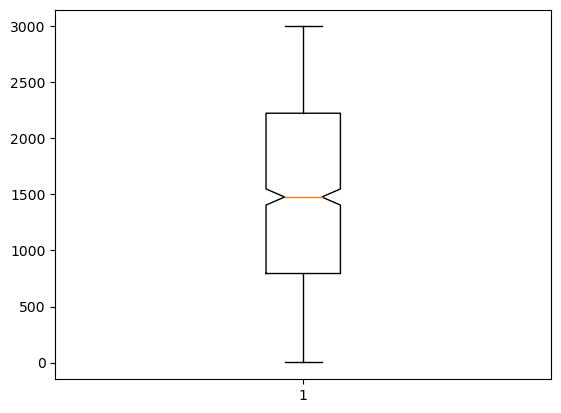

In [192]:
# 6. Create a box plot to visualize outliers
plt.boxplot(df_visit.visit, notch=True)

In [193]:
# 1. Connect to the SQLite database (it will create a new one if it doesn't exist)
conn = sqlite3.connect('my_database.db')


In [194]:
# 2. Create a cursor to interact with the database
cursor = conn.cursor()

In [195]:
# 3. Create a table with the specified columns (Name, Address, City, State, Zip, Phone Number)
cursor.execute('''CREATE TABLE IF NOT EXISTS my_table (
                  Name TEXT,
                  Address TEXT,
                  City TEXT,
                  State TEXT,
                  Zip TEXT,
                  Phone_Number TEXT
                )''')


In [196]:
# 4. Insert at least 10 rows of data into the table
data_to_insert = [
    ('John Doe', '123 Main St', 'New York', 'NY', '10001', '123-456-7890'),
    ('Jane Smith', '456 Elm St', 'Los Angeles', 'CA', '90001', '987-654-3210'),
    ('Alice Johnson', '789 Oak St', 'Chicago', 'IL', '60601', '555-123-4567'),
    # Add more rows here...
]

cursor.executemany('INSERT INTO my_table VALUES (?, ?, ?, ?, ?, ?)', data_to_insert)

# Commit the changes to the database
conn.commit()



In [197]:
# 5. Execute a query to generate results (e.g., selecting all rows)
cursor.execute('SELECT * FROM my_table')

# Fetch and print the results
results = cursor.fetchall()
for row in results:
    print(row)

# Close the database connection
conn.close()

('John Doe', '123 Main St', 'New York', 'NY', '10001', '123-456-7890')
('Jane Smith', '456 Elm St', 'Los Angeles', 'CA', '90001', '987-654-3210')
('Alice Johnson', '789 Oak St', 'Chicago', 'IL', '60601', '555-123-4567')
